<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/Assignments/fourth%20Assing./assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important imports



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests, io
from sklearn.preprocessing import scale

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # 

#importing Data
I imprort data from my git hub page


In [0]:
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./X.npz'
s=requests.get(url, stream=True).content
data_X=np.load(io.BytesIO(s) )
url = 'https://github.com/alifele/Machine_learning/raw/master/Assignments/fourth%20Assing./Y.npz'
s=requests.get(url, stream=True).content
data_Y = np.load(io.BytesIO(s))

the shape of X is (102352, 1024): 
the shape of Y is (102352,): 


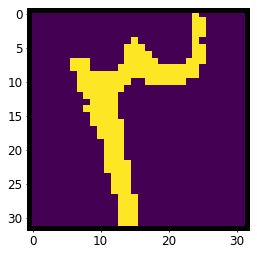

In [104]:
X = data_X['arr_0'].reshape(-1,32*32)
# X = scale(X)    scaling data destroyes them. TRY it!!!
X_pic = X.reshape(-1,32,32)
Y = data_Y['arr_0']

plt.imshow(X_pic[12])
print('the shape of X is {}: '.format(X.shape))
print('the shape of Y is {}: '.format(Y.shape))



#Visualising data

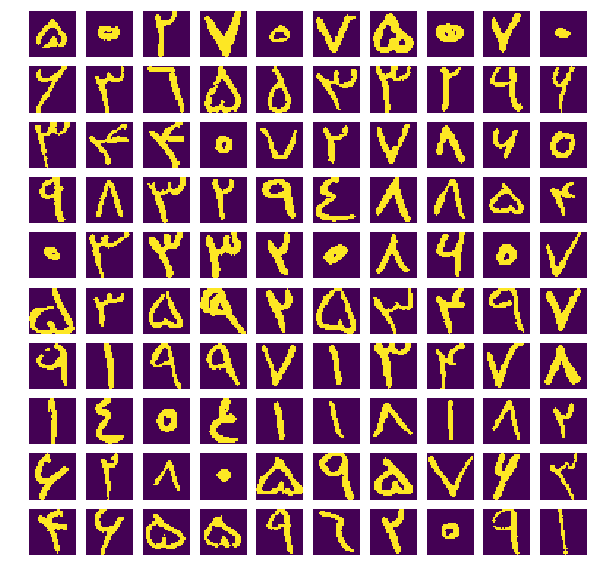

In [105]:
fig = plt.figure(figsize = (10,10))
for i in range(1,101):
  ax = fig.add_subplot(10,10,i)
  ax.imshow(X_pic[i])
  ax.axis("off")
  
  

#Short about our data set
our data set is a collection of 32*32 pixel of persian hand writing digits

the number of digits is 102352 

#Implementing PCA method for feature reduction

In [106]:
from sklearn.decomposition import PCA
n_components = 20
pca = PCA(n_components)
pca.fit(X)
pca_X = pca.transform(X)
print('the shape of the original data is : {}'.format(X.shape))
print('the shape of the data after implementing PCA is : {}'.format(pca_X.shape))

the shape of the original data is : (102352, 1024)
the shape of the data after implementing PCA is : (102352, 20)


the shape of the pca_X_pic is : (102352, 32, 32)
the result with n_components = 20 is :


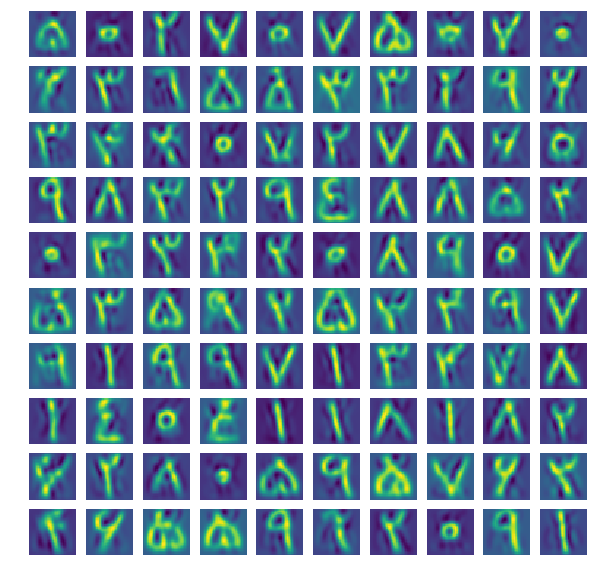

In [107]:
pca_X_pic = pca.inverse_transform(pca_X)
pca_X_pic = pca_X_pic.reshape(-1,32,32)
print('the shape of the pca_X_pic is : {}'.format(pca_X_pic.shape))
print('the result with n_components = {} is :'.format(n_components))
fig = plt.figure(figsize=(10,10))
for i in range(1,101):
  ax = fig.add_subplot(10,10,i)
  ax.imshow(pca_X_pic[i])
  ax.axis('off')
  

#Ploting the SCREE plot of the features
in this section I want to plot the importance of the pca features in a bar plot

the scree plot of the features is :


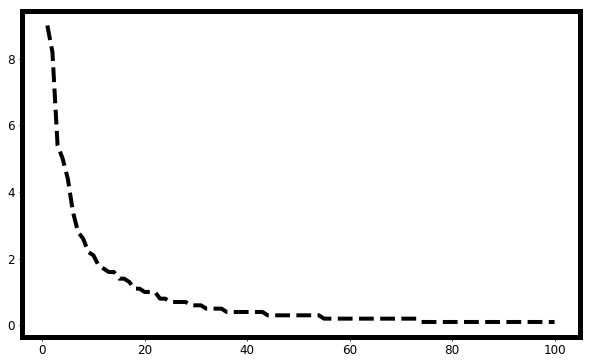

In [108]:
n=100
pca = PCA(n)
pca.fit(X)
data = pca.transform(X)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
#labels = ["PC" + str(i) for i in range (1,len(per_var)+1)]
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
print('the scree plot of the features is :')
#ax.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
ax.plot(range(1,len(per_var)+1),per_var,'k--',linewidth=4,)

#Mian part of code
now we have both original data and 'PCA' ed data 


The Originial data is -----> **X**. Its shape is (n_s,32*32). We also have this data set as Images. i.e.** X_pic** which its shape is (n_s,32,32)

The 'PCA' ed data is ------> **pca_X**. Its shape is (n_s, n_com*n_com). **(((Note tata n_com is the numper of PCA components)))**.We also have 'PCA' ed data as image which is **pca_X_pic**

**now until end I will implement the algorithms on ORIGINAL data**

#Data preparation


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y)
pca_X_train, pca_X_test, Y_train, Y_test =  train_test_split(pca_X,Y)




---



---



---


#Linear Regression

In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
score = model.score(X_test, Y_test)
print("the score of the linear regression is: {} ".format(score))

the score of the linear regression is: -0.012458557584568597 


And some cool predictions:

[4.006109]


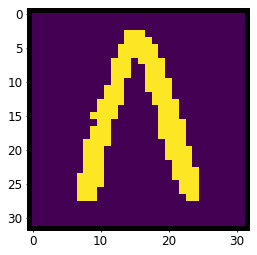

In [111]:
i=32
plt.imshow(X[i].reshape(32,32))
predict=model.predict(X[i].reshape(1,-1))
print(predict)

#Support Vector Machine Classifier

In [112]:
from sklearn import svm
model = svm.SVC(kernel='linear')
# runnig this algorithm with ariginal data takes very very long time
# so for this regressoin i am going to use 'PCA'ed data
model.fit(pca_X_train, Y_train)
score = model.score(pca_X_test, Y_test)
print("the score of the SVC is: {} ".format(score))

the score of the SVC is: 0.943215569798343 


and some cool prediction

the predicted value is: [9]


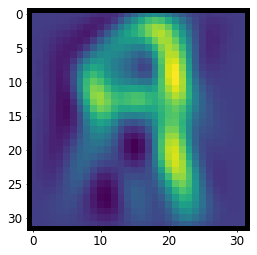

In [113]:
i = 755
plt.imshow(pca_X_pic[i])
print('the predicted value is: {}'.format(model.predict(pca_X[i].reshape(-1,20))))


**Confusing matrix**


|TP||FP|
|----||----|
|FN ||TN|

In [114]:

Y_predict = model.predict(pca_X_test)
cnfmatrix = confusion_matrix(Y_test,Y_predict)
print(cnfmatrix)

[[2427    0    0    1    3   16    2    1    0    0]
 [   3 2568    3    0    7    0    6    1    0   13]
 [   5   27 2325   63   26    0   31    4    0   15]
 [   5    0  147 2290  154    3    9    1    0    2]
 [  12   12   62  199 2215   14   20    6    9   14]
 [  15    1    0    3   16 2499    4   11   14    1]
 [   6   16   54   19   15    3 2299   18    7   79]
 [   4    4   13    0    8   11   10 2583    1    0]
 [   7    2    2    1   15    7   10    4 2548   14]
 [   2   21    9    2   11    2   91    1   23 2381]]


**Classification report**

In [115]:
clf_report = classification_report(Y_test, Y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2450
           1       0.97      0.99      0.98      2601
           2       0.89      0.93      0.91      2496
           3       0.89      0.88      0.88      2611
           4       0.90      0.86      0.88      2563
           5       0.98      0.97      0.98      2564
           6       0.93      0.91      0.92      2516
           7       0.98      0.98      0.98      2634
           8       0.98      0.98      0.98      2610
           9       0.95      0.94      0.94      2543

   micro avg       0.94      0.94      0.94     25588
   macro avg       0.94      0.94      0.94     25588
weighted avg       0.94      0.94      0.94     25588





---



---



---


#K Nearst Neigbors Classifier



In [116]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(10)
model.fit(pca_X_train, Y_train)
score = model.score(pca_X_test, Y_test)
print("the score of the linear regression is: {} ".format(score))

the score of the linear regression is: 0.9758480537752071 


and now some cool predictions

the predict value is :[2]


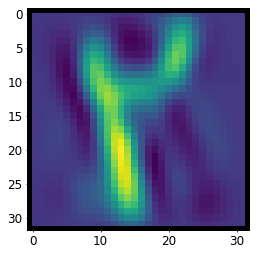

In [117]:
i = 776
plt.imshow(pca_X_pic[i])
predict = model.predict(pca_X[i].reshape(-1,20))
print("the predict value is :{}".format(predict))

**Confusing matrix**


|TP||FP|
|----||----|
|FN ||TN|

In [118]:
Y_predict = model.predict(pca_X_test)
cnfmatrix = confusion_matrix(Y_test,Y_predict)
print(cnfmatrix)


[[2442    0    0    0    2    6    0    0    0    0]
 [   0 2595    0    0    0    0    1    1    1    3]
 [   3   23 2389   65    2    0    5    4    0    5]
 [   2    1   91 2463   52    2    0    0    0    0]
 [   1    6   35  126 2380    4    4    3    0    4]
 [   9    3    0    0   10 2532    1    1    7    1]
 [   0    8    3    0    2    2 2475    1    2   23]
 [   1    7   12    0    1    0    1 2612    0    0]
 [   2    8    0    0    1    0    0    2 2591    6]
 [   1   14    1    0    0    0   30    0    6 2491]]


**Classification Report**

In [119]:
clf_report = classification_report(Y_test, Y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2450
           1       0.97      1.00      0.99      2601
           2       0.94      0.96      0.95      2496
           3       0.93      0.94      0.94      2611
           4       0.97      0.93      0.95      2563
           5       0.99      0.99      0.99      2564
           6       0.98      0.98      0.98      2516
           7       1.00      0.99      0.99      2634
           8       0.99      0.99      0.99      2610
           9       0.98      0.98      0.98      2543

   micro avg       0.98      0.98      0.98     25588
   macro avg       0.98      0.98      0.98     25588
weighted avg       0.98      0.98      0.98     25588





---



---



---



#Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(pca_X_train,Y_train)
score = model.score(pca_X_test, Y_test) 
print("the score of the linear regression is: {} ".format(score))

the score of the linear regression is: 0.9190636235735501 


and now some cool predictions

the predict value is :[3]


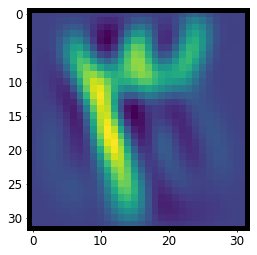

In [121]:
i = 12
plt.imshow(pca_X_pic[i])
predict = model.predict(pca_X[i].reshape(-1,20))
print("the predict value is :{}".format(predict))

**Confusing matrix**


|TP||FP|
|----||----|
|FN ||TN|

In [122]:
Y_predict = model.predict(pca_X_test)
cnfmatrix = confusion_matrix(Y_test,Y_predict)
print(cnfmatrix)


[[2394    2    1   10    8   23    5    2    3    2]
 [   4 2520   28    0   11    2    9    6    1   20]
 [   3   27 2205  122   54    4   26   30    5   20]
 [  11    2  116 2218  221    5   17    7    2   12]
 [  11    8   75  197 2146   36   41   11   13   25]
 [  20    2    5   12   46 2404   10   13   42   10]
 [   2    8   27   18   35   11 2274   50   11   80]
 [   5    6   25   10   13   12   45 2513    2    3]
 [   3    1    5    3   18   40   16    1 2494   29]
 [   3   14   21    9   14    8   90    6   29 2349]]


**Classificatoin Report**

In [123]:
clf_report = classification_report(Y_test, Y_predict)
print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2450
           1       0.97      0.97      0.97      2601
           2       0.88      0.88      0.88      2496
           3       0.85      0.85      0.85      2611
           4       0.84      0.84      0.84      2563
           5       0.94      0.94      0.94      2564
           6       0.90      0.90      0.90      2516
           7       0.95      0.95      0.95      2634
           8       0.96      0.96      0.96      2610
           9       0.92      0.92      0.92      2543

   micro avg       0.92      0.92      0.92     25588
   macro avg       0.92      0.92      0.92     25588
weighted avg       0.92      0.92      0.92     25588

